Prepare a classification model using Naive Bayes for salary Train data.


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plts
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [ ]:
salarydata_train = pd.read_csv('SalaryData_Train.csv')
salarydata_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory data analysis

In [ ]:
salarydata_train.shape

(30161, 14)

We can see that there are 30161 instances and 14 attributes in the training data set.

In [ ]:
# preview the Trainig dataset
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# View summary of Training dataset

# **Performing** **EDA**

In [ ]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#Finding the special characters in the data frame 
salarydata_train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
print(salarydata_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

# Explore categorical variables

In [ ]:
# find categorical variables

categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [ ]:
# view the categorical variables

salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Summary of categorical variables

There are 9 categorical variables.

The categorical variables are given by workclass, education, maritalstatus, occupation, relationship, race, sex, native and Salary.

Salary is the target variable.

In [ ]:
# check missing values in categorical variables
salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [ ]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [ ]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts()/np.float(len(salarydata_train)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [ ]:
# check labels in workclass variable

salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [ ]:
# check frequency distribution of values in workclass variable

salarydata_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [ ]:
# check labels in occupation variable

salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
# check frequency distribution of values in occupation variable

salarydata_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# check labels in native_country variable

salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [ ]:
# check frequency distribution of values in native_country variable

salarydata_train.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [ ]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(salarydata_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [ ]:
# find numerical variables

numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [ ]:
# view the numerical variables

salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [ ]:
# check missing values in numerical variables

salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

# Visualization

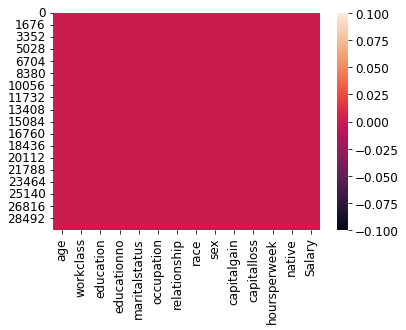

In [ ]:
import seaborn as sns
sns.heatmap(salarydata_train.isnull())


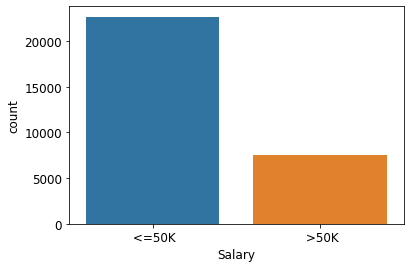

In [ ]:
sns.countplot(salarydata_train['Salary'])

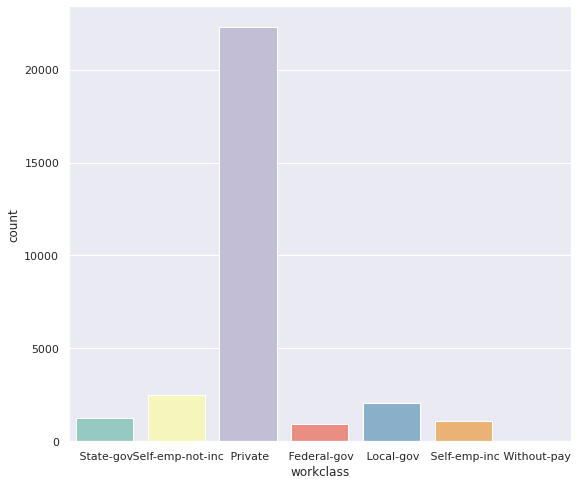

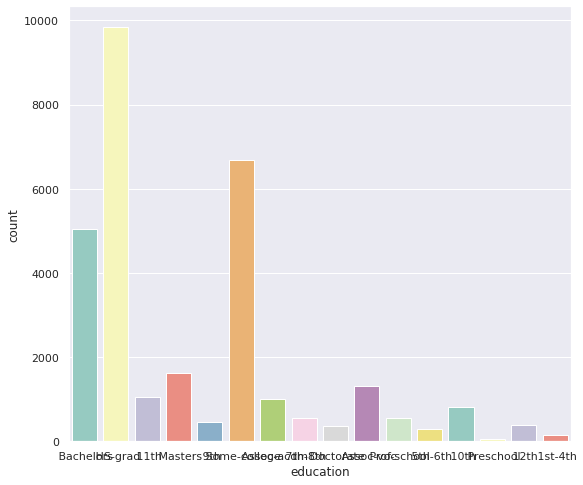

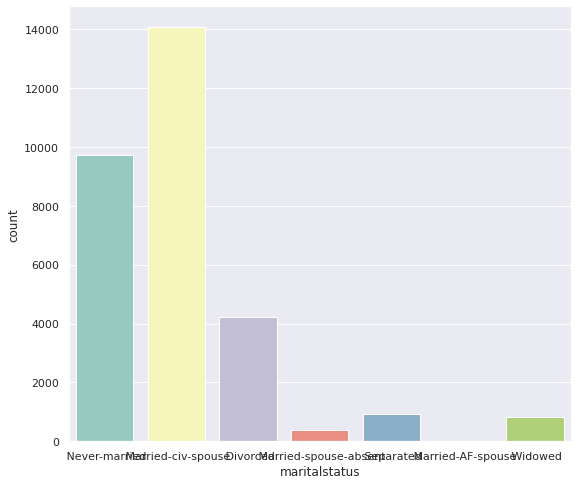

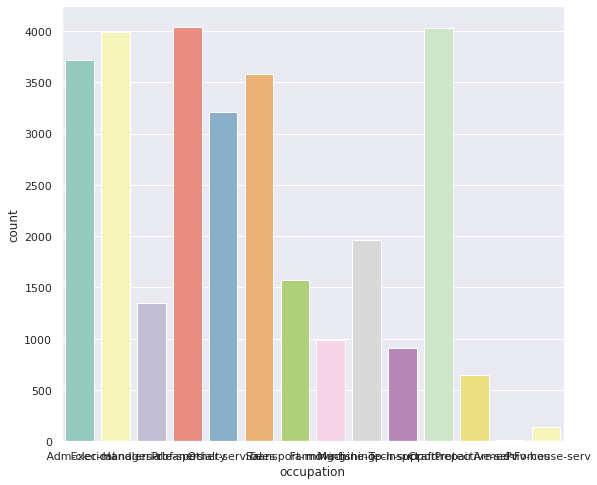

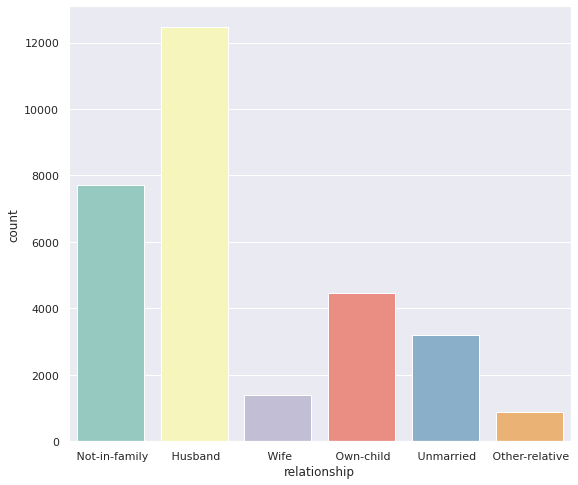

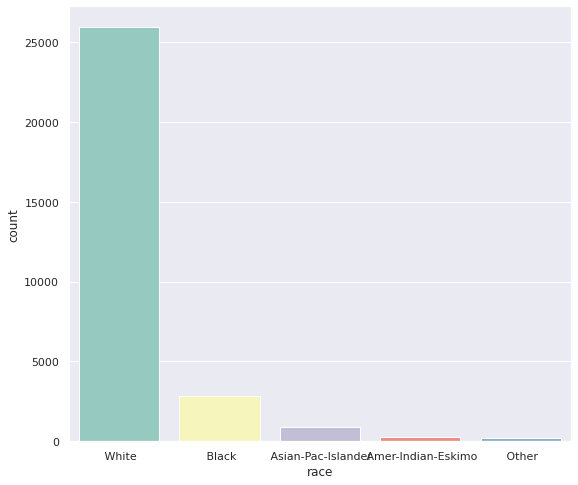

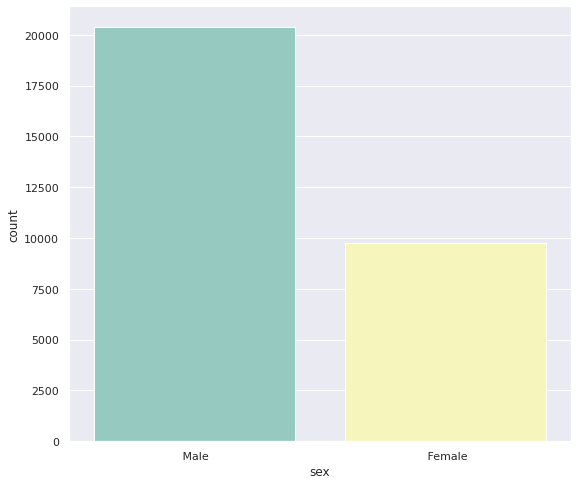

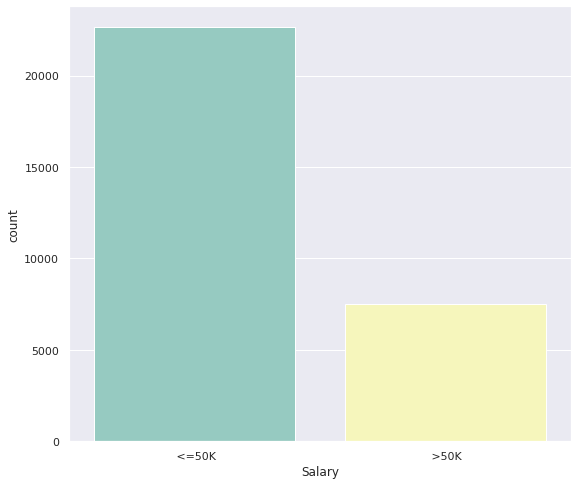

In [ ]:
#countplot for all categorical columns
sns.set(rc={'figure.figsize':(9,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plts.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = salarydata_train, palette = 'Set3');

<Figure size 1440x720 with 0 Axes>

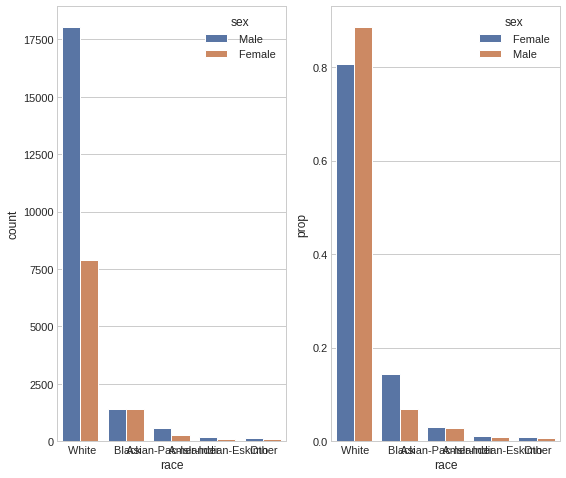

In [ ]:
plts.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plts.figure(figsize=(20,10)) 
f, axes = plts.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=salarydata_train, ax=axes[0])

prop_df = (salarydata_train[x]
           .groupby(salarydata_train[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

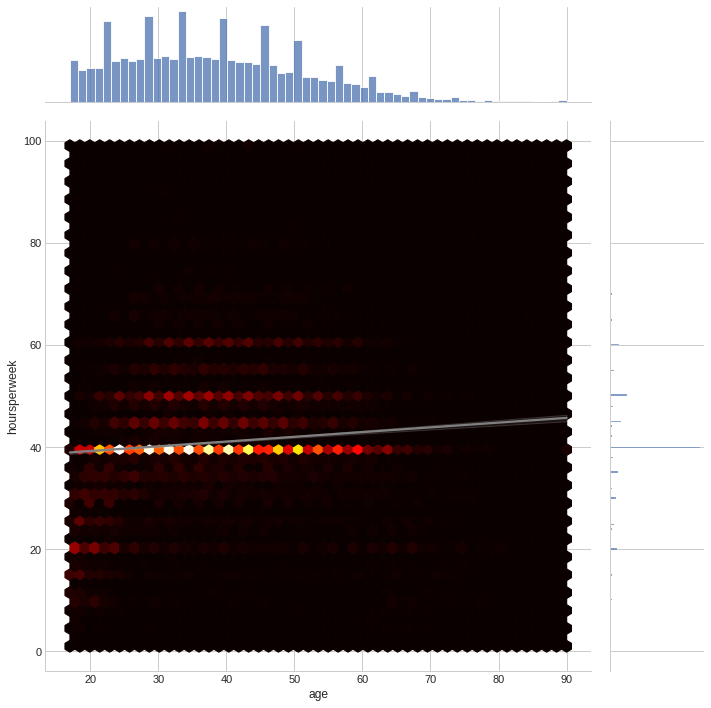

In [ ]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = salarydata_train, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(salarydata_train.age, salarydata_train['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')


# Declare feature vector and target variable

In [ ]:
X = salarydata_train.drop(['Salary'], axis=1)

y = salarydata_train['Salary']

# Split data into separate training and test set 

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape


((21112, 13), (9049, 13))

# Feature Engineering

In [ ]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [ ]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [ ]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [ ]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [ ]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)  

In [ ]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()


workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [ ]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [ ]:
# check missing values in X_train

X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [ ]:
# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

***Encode*** ***categorical*** ***variables***

In [ ]:
# print categorical variables

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [ ]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
8166,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
7138,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States
437,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States
5436,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6541,Self-emp-not-inc,HS-grad,Married-civ-spouse,Tech-support,Husband,White,Male,United-States


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 618 kB/s 


In [ ]:
 import category_encoders as ce

In [ ]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape

(21112, 102)

In [ ]:
X_test.shape

(9049, 102)

In [ ]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Feature Scaling 

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model training 

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

# Predict the results 

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

# Check accuracy score 

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7995


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8023


# Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8023
Test set score: 0.7995


The training-set accuracy score is 0.8023.while the test-set accuracy to be 0.7995. These two values are quite comparable. So, there is no sign of overfitting.

Compare model accuracy with null accuracy
So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [ ]:
# check class distribution in test set

y_test.value_counts()

 <=50K    6798
 >50K     2251
Name: Salary, dtype: int64

We can see that the occurences of most frequent class is 6798. So, we can calculate null accuracy by dividing 6798 by total number of occurences.

In [ ]:
# check null accuracy score

null_accuracy = (6798/(6798+2251))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7512


We can see that our model accuracy score is 0.7995 but null accuracy score is 0.7512. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# Confusion matrix 

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5422 1376]
 [ 438 1813]]

True Positives(TP) =  5422

True Negatives(TN) =  1813

False Positives(FP) =  1376

False Negatives(FN) =  438


The confusion matrix shows 5422 + 1813 = 7235 correct predictions and 1376 + 438 = 1814 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 5422
True Negatives (Actual Negative:0 and Predict Negative:0) - 1813
False Positives (Actual Negative:0 but Predict Positive:1) - 1376 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 438 (Type II error)

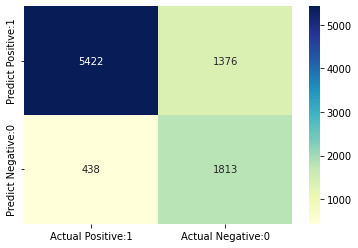

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      6798
        >50K       0.57      0.81      0.67      2251

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7995


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2005


In [ ]:
 #print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7976


Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9253


True Positive Rate

True Positive Rate is synonymous with Recall.

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9253


False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4315


Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5685


f1-score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

Support

Support is the actual number of occurrences of the class in our dataset.

# Calculate class probabilities 

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99955511e-01, 4.44887598e-05],
       [9.95935549e-01, 4.06445120e-03],
       [8.63901480e-01, 1.36098520e-01],
       [9.99999906e-01, 9.37239455e-08],
       [8.80888343e-02, 9.11911166e-01],
       [9.99562896e-01, 4.37103927e-04],
       [5.34482750e-06, 9.99994655e-01],
       [6.28497161e-01, 3.71502839e-01],
       [5.46536963e-04, 9.99453463e-01],
       [9.99999570e-01, 4.30495598e-07]])

Observations
In each row, the numbers sum to 1.
There are 2 columns which correspond to 2 classes - <=50K and >50K.

Class 0 => <=50K - Class that a person makes less than equal to 50K.

Class 1 => >50K - Class that a person makes more than 50K.

Importance of predicted probabilities

We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.999956,4.448876e-05
1,0.995936,4.064451e-03
2,0.863901,1.360985e-01
3,1.000000,9.372395e-08
4,0.088089,9.119112e-01
5,0.999563,4.371039e-04
6,0.000005,9.999947e-01
7,0.628497,3.715028e-01
8,0.000547,9.994535e-01
9,1.000000,4.304956e-07


In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([4.44887598e-05, 4.06445120e-03, 1.36098520e-01, 9.37239455e-08,
       9.11911166e-01, 4.37103927e-04, 9.99994655e-01, 3.71502839e-01,
       9.99453463e-01, 4.30495598e-07])

In [ ]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

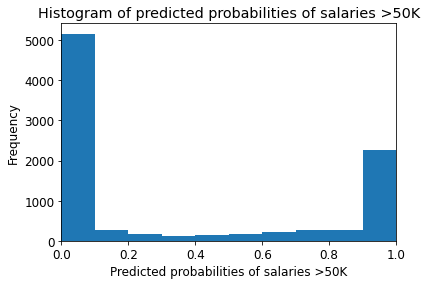

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plts.rcParams['font.size'] = 12


# plot histogram with 10 bins
plts.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plts.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plts.xlim(0,1)


# set the title
plts.xlabel('Predicted probabilities of salaries >50K')
plts.ylabel('Frequency')

Observations

We can see that the above histogram is highly positive skewed.

The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.

There are relatively small number of observations with probability > 0.5.

So, these small number of observations predict that the salaries will be >50K.

Majority of observations predcit that the salaries will be <=50K.

# ROC-AUC

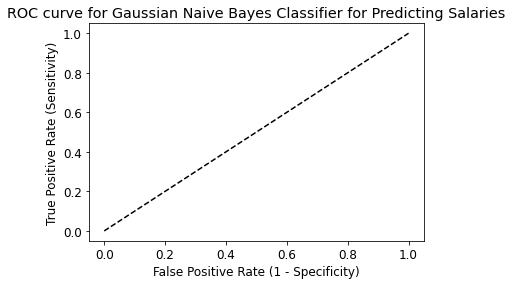

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plts.figure(figsize=(6,4))

plts.plot(fpr, tpr, linewidth=2)

plts.plot([0,1], [0,1], 'k--' )

plts.rcParams['font.size'] = 12

plts.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plts.xlabel('False Positive Rate (1 - Specificity)')

plts.ylabel('True Positive Rate (Sensitivity)')

plts.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8902


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8923


# k-Fold Cross Validation 

In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81676136 0.79829545 0.79014685 0.81288489 0.80388441 0.79062056
 0.80767409 0.7925154  0.79630507 0.80909522]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8018


Using the mean cross-validation, we can conclude that we expect the model to be around 80.18% accurate on average.

Our original model accuracy is 0.8023, but the mean cross-validation accuracy is 0.8018. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

# Prepare a classification model using Naive Bayes for salary Test data.

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [3]:
salarydata_test=pd.read_csv('SalaryData_Test.csv')

In [4]:
salarydata_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Exploratory data analysis

In [5]:
salarydata_test.shape

(15060, 14)

We can see that there are 15060 instances and 14 attributes in the testnig data set.



In [95]:
# preview the Testing dataset
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Performing EDA

In [7]:
salarydata_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
salarydata_test.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [10]:
#Finding the special characters in the data frame 
salarydata_test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
print(salarydata_test[0:5])

   age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <

# Explore categorical variables

In [12]:
# find categorical variables

categorical = [var for var in salarydata_test.columns if salarydata_test[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [13]:
# view the categorical variables

salarydata_test[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [14]:
# check missing values in categorical variables
salarydata_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [15]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(salarydata_test[var].value_counts())

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-servic

In [17]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(salarydata_test[var].value_counts()/np.float(len(salarydata_test)))

 Private             0.731806
 Self-emp-not-inc    0.086122
 Local-gov           0.068592
 State-gov           0.044290
 Self-emp-inc        0.037981
 Federal-gov         0.030744
 Without-pay         0.000465
Name: workclass, dtype: float64
 HS-grad         0.328220
 Some-college    0.213878
 Bachelors       0.167729
 Masters         0.058898
 Assoc-voc       0.043293
 11th            0.037915
 Assoc-acdm      0.033134
 10th            0.026760
 7th-8th         0.017663
 Prof-school     0.016135
 9th             0.014675
 12th            0.013280
 Doctorate       0.011222
 5th-6th         0.010691
 1st-4th         0.004714
 Preschool       0.001793
Name: education, dtype: float64
 Married-civ-spouse       0.464143
 Never-married            0.323506
 Divorced                 0.138313
 Separated                0.031341
 Widowed                  0.029880
 Married-spouse-absent    0.012085
 Married-AF-spouse        0.000730
Name: maritalstatus, dtype: float64
 Exec-managerial      0.13227

In [18]:
# check labels in workclass variable

salarydata_test.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [19]:
# check frequency distribution of values in workclass variable

salarydata_test.workclass.value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [20]:
# check labels in occupation variable

salarydata_test.occupation.unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [21]:
# check frequency distribution of values in occupation variable
salarydata_test.occupation.value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [22]:
# check labels in native_country variable

salarydata_test.native.unique()

array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [23]:
# check frequency distribution of values in native_country variable

salarydata_test.native.value_counts()

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 South                            30
 Dominican-Republic               30
 Japan                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

In [24]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(salarydata_test[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [25]:
# find numerical variables

numerical = [var for var in salarydata_test.columns if salarydata_test[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [26]:
# view the numerical variables

salarydata_test[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30


In [27]:
# check missing values in numerical variables

salarydata_test[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

# Vissualization

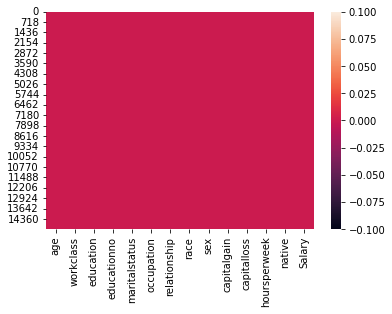

In [28]:
import seaborn as sns
sns.heatmap(salarydata_test.isnull())

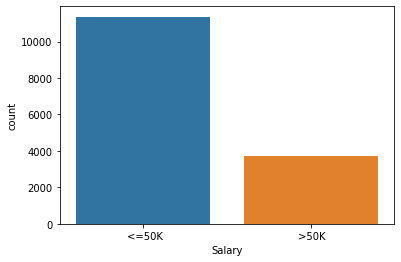

In [29]:
sns.countplot(salarydata_test['Salary'])

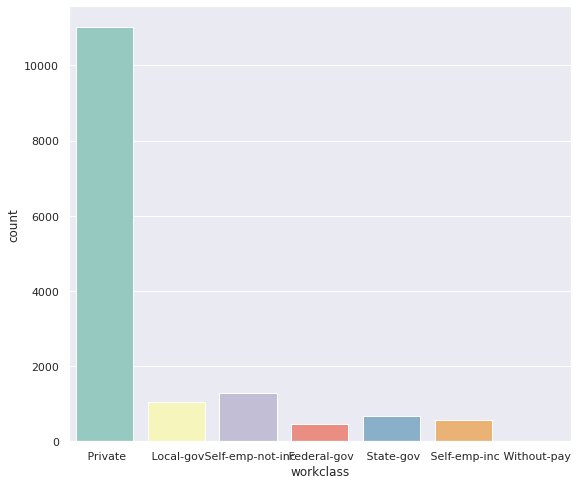

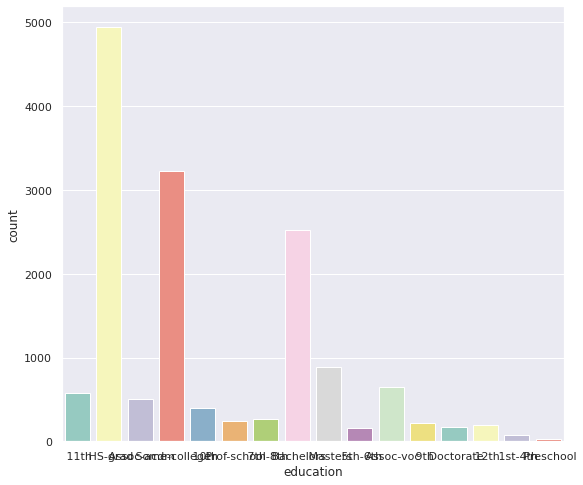

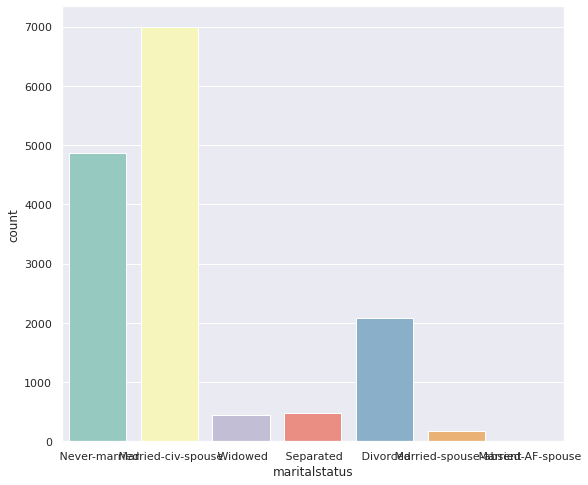

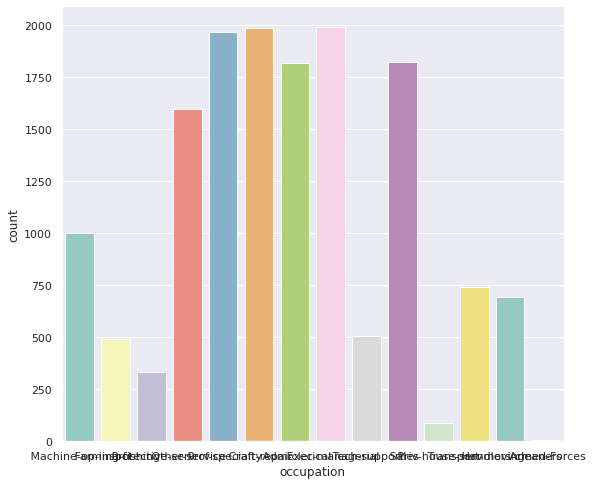

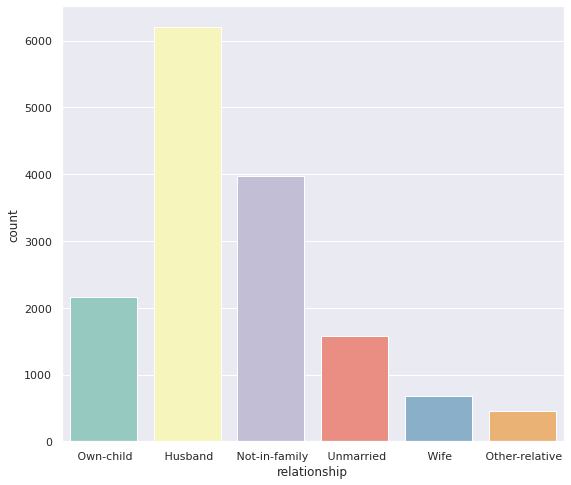

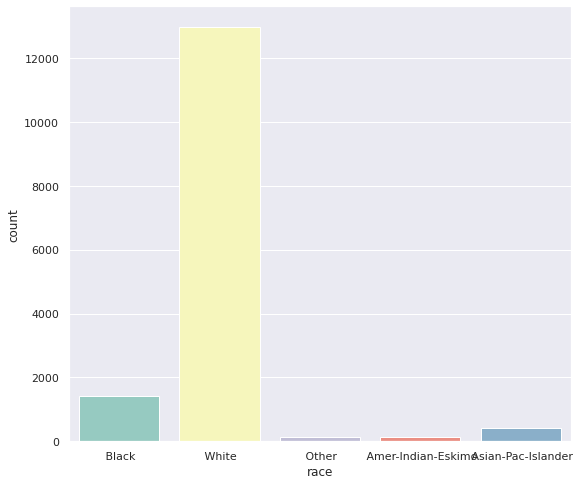

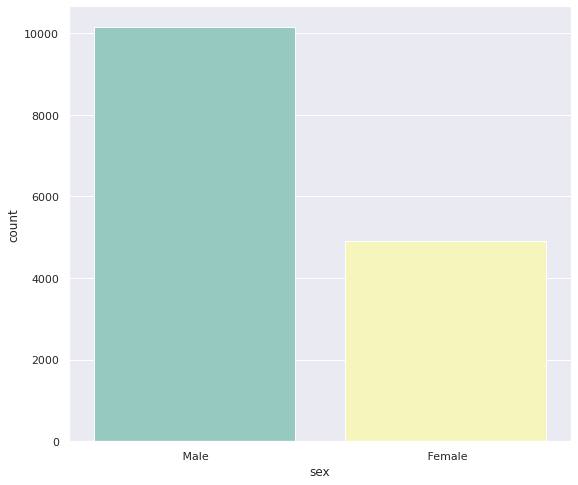

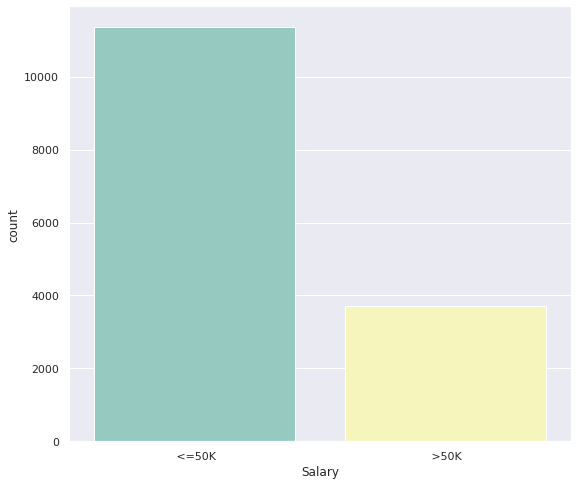

In [30]:
#countplot for all categorical columns
sns.set(rc={'figure.figsize':(9,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plts.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = salarydata_test, palette = 'Set3');

<Figure size 1440x720 with 0 Axes>

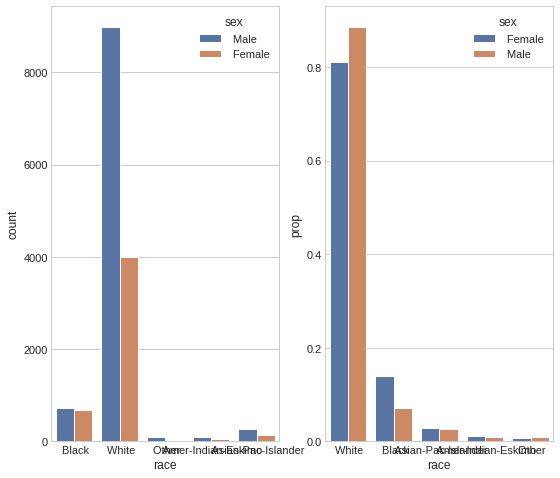

In [33]:
plts.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plts.figure(figsize=(20,10)) 
f, axes = plts.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=salarydata_test, ax=axes[0])

prop_df = (salarydata_test[x]
           .groupby(salarydata_test[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

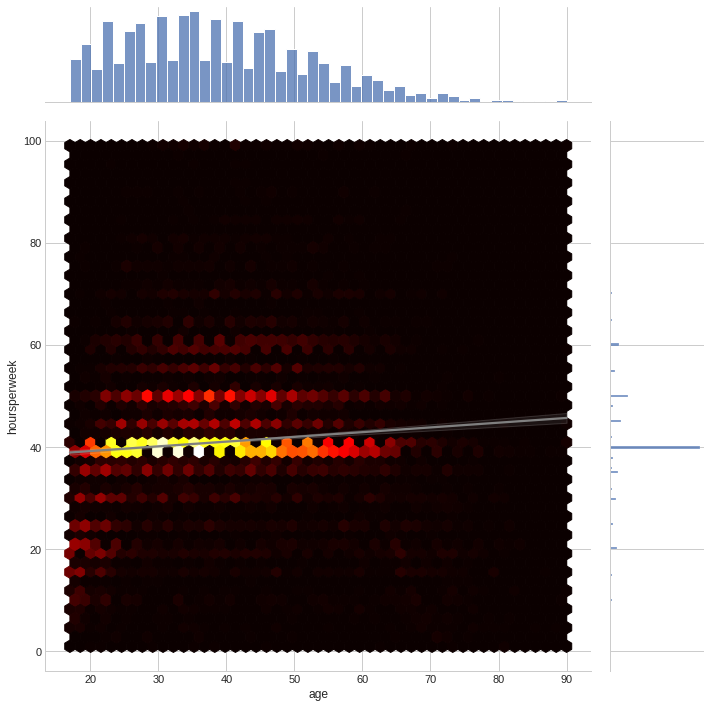

In [96]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = salarydata_test, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(salarydata_test.age, salarydata_test['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

# Declare feature vector and target variable

In [34]:
x = salarydata_test.drop(['Salary'], axis=1)

Y = salarydata_test['Salary']

# Split data into separate training and test set

In [35]:
# split x and Y into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state = 0)


In [37]:
#check the shape of X_train and X_test

x_train.shape, x_test.shape

((10542, 13), (4518, 13))

# Feature Engineering

In [39]:
x_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [40]:
# display categorical variables

categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [41]:
# display numerical variables

numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [42]:
# print percentage of missing values in the categorical variables in testing set

x_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [43]:
# print categorical variables with missing data

for col in categorical:
    if x_train[col].isnull().mean()>0:
        print(col, (x_train[col].isnull().mean()))

In [44]:
# impute missing categorical variables with most frequent value

for df2 in [x_train, x_test]:
    df2['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(x_train['native'].mode()[0], inplace=True) 

In [45]:
# check missing values in categorical variables in X_train

x_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [46]:
# check missing values in categorical variables in X_test

x_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [47]:
# check missing values in X_train

x_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [48]:
# check missing values in X_test

x_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

Encode categorical variables

In [49]:
# print categorical variables

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [50]:
x_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
4324,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2179,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,India
1906,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Black,Female,United-States
5206,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,United-States
4659,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,United-States


In [51]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 712 kB/s 


In [52]:
import category_encoders as ce

In [53]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [54]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4324,41,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2179,53,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1906,65,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5206,63,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4659,23,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
x_train.shape

(10542, 102)

In [56]:
x_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4269,37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7027,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8418,41,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10064,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3305,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling

In [57]:
cols = x_train.columns

In [58]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [59]:
x_train = pd.DataFrame(x_train, columns=[cols])

In [60]:
x_test = pd.DataFrame(x_test, columns=[cols])

In [61]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model training

In [63]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, Y_train)

GaussianNB()

# Predict the results

In [64]:
Y_pred = gnb.predict(x_test)

Y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

# Check accuracy score

In [65]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.8028


In [66]:
Y_pred_train = gnb.predict(x_train)

Y_pred_train

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# Check for overfitting and underfitting

In [67]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, Y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, Y_test)))

Training set score: 0.8017
Test set score: 0.8028


The training-set accuracy score is 0.8017.while the test-set accuracy to be 0.8028. These two values are quite comparable. So, there is no sign of overfitting.

In [68]:
# check class distribution in test set

Y_test.value_counts()

 <=50K    3385
 >50K     1133
Name: Salary, dtype: int64

We can see that the occurences of most frequent class is 3385. So, we can calculate null accuracy by dividing 1133 by total number of occurences.

In [97]:
# check null accuracy score

null_accuracy = (3385/(3385+1133))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7492


We can see that our model accuracy score is 0.8028 but null accuracy score is 0.7492.So,we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

# Confusion matrix

In [70]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2709  676]
 [ 215  918]]

True Positives(TP) =  2709

True Negatives(TN) =  918

False Positives(FP) =  676

False Negatives(FN) =  215


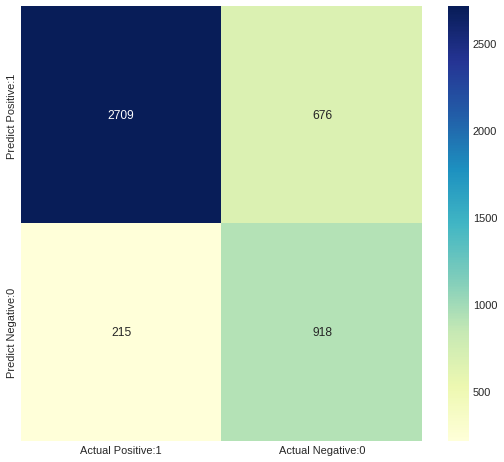

In [71]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices

In [72]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      3385
        >50K       0.58      0.81      0.67      1133

    accuracy                           0.80      4518
   macro avg       0.75      0.81      0.77      4518
weighted avg       0.84      0.80      0.81      4518



In [73]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [74]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8028


In [75]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1972


In [76]:
#print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8003


In [77]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9265


In [78]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9265


In [79]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4241


In [80]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5759


f1-score
f1-score is the weighted harmonic mean of precision and recall.The best possible f1-score would be 1.0 and the worst be 0.0. f1-score is the harmonic mean of precison and recall.So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.The weighted average of f1-score should be used to compare classifier models,not global accuracy. 

# Calculate class probabilities

In [82]:
# print the first 10 predicted probabilities of two classes- 0 and 1

Y_pred_prob = gnb.predict_proba(x_test)[0:10]

Y_pred_prob

array([[3.48154770e-02, 9.65184523e-01],
       [9.99971965e-01, 2.80346728e-05],
       [9.58220760e-01, 4.17792398e-02],
       [9.99998598e-01, 1.40217160e-06],
       [7.44380787e-02, 9.25561921e-01],
       [9.99011204e-01, 9.88795606e-04],
       [9.99999974e-01, 2.63003814e-08],
       [9.99999999e-01, 9.51848857e-10],
       [2.69689128e-01, 7.30310872e-01],
       [8.01706993e-09, 9.99999992e-01]])

In [84]:
# store the probabilities in dataframe

Y_pred_prob_df = pd.DataFrame(data=Y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

Y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,3.481548e-02,9.651845e-01
1,9.999720e-01,2.803467e-05
2,9.582208e-01,4.177924e-02
3,9.999986e-01,1.402172e-06
4,7.443808e-02,9.255619e-01
5,9.990112e-01,9.887956e-04
6,1.000000e+00,2.630038e-08
7,1.000000e+00,9.518489e-10
8,2.696891e-01,7.303109e-01
9,8.017070e-09,1.000000e+00


In [86]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(x_test)[0:10, 1]

array([9.65184523e-01, 2.80346728e-05, 4.17792398e-02, 1.40217160e-06,
       9.25561921e-01, 9.88795606e-04, 2.63003814e-08, 9.51848857e-10,
       7.30310872e-01, 9.99999992e-01])

In [87]:
# store the predicted probabilities for class 1 - Probability of >50K

Y_pred1 = gnb.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'Frequency')

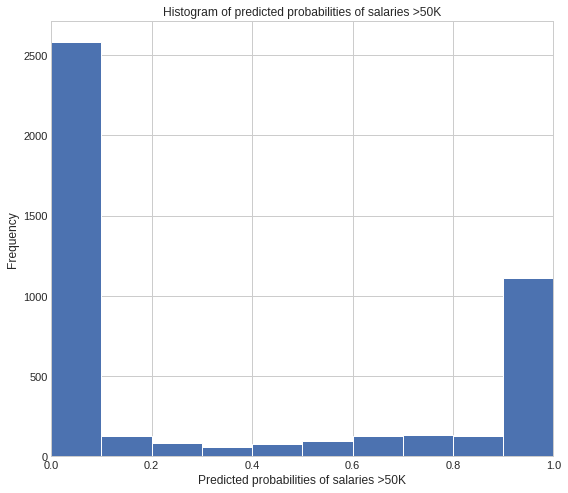

In [89]:
# plot histogram of predicted probabilities


# adjust the font size 
plts.rcParams['font.size'] = 12


# plot histogram with 10 bins
plts.hist(Y_pred1, bins = 10)


# set the title of predicted probabilities
plts.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plts.xlim(0,1)


# set the title
plts.xlabel('Predicted probabilities of salaries >50K')
plts.ylabel('Frequency')

# ROC-AUC

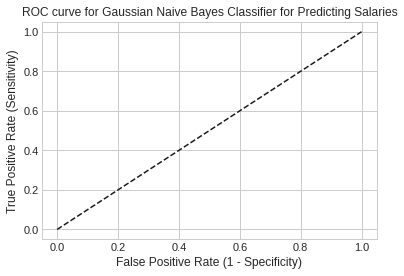

In [90]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred1, pos_label = '>50K')

plts.figure(figsize=(6,4))

plts.plot(fpr, tpr, linewidth=2)

plts.plot([0,1], [0,1], 'k--' )

plts.rcParams['font.size'] = 12

plts.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plts.xlabel('False Positive Rate (1 - Specificity)')

plts.ylabel('True Positive Rate (Sensitivity)')

plts.show()

In [91]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(Y_test, Y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8909


In [92]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, x_train, Y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8889


# k-Fold Cross Validation

In [93]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, Y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8        0.78957346 0.81593928 0.80265655 0.80645161 0.77419355
 0.81783681 0.78557875 0.81119545 0.80265655]


In [94]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8006


Using the mean cross-validation,we can conclude that we expect the model to be around 80.06%  accuratte on average.